## Фильтрация ЭМГ с помощью вейвлет функции

Фильтрация ЭМГ (электромиографии) с использованием вейвлет-функций - это метод обработки сигнала, который позволяет выделить интересующие компоненты из временного ряда сигнала ЭМГ.

Основная идея заключается в применении вейвлет-функций к исходному сигналу ЭМГ и использовании их свойств для фильтрации различных частотных компонентов. Вейвлет-функции представляют собой особые функции, которые обладают хорошим разрешением по времени и частоте, позволяя локализовать различные компоненты сигнала.

Процесс фильтрации с использованием вейвлет-функций включает следующие шаги:

* Выбор вейвлет-функции: Выберите подходящую вейвлет-функцию в соответствии с требованиями фильтрации ЭМГ. Различные типы вейвлет-функций могут быть эффективными для различных типов сигналов.
* Декомпозиция сигнала: Примените выбранную вейвлет-функцию к исходному сигналу ЭМГ с помощью дискретного вейвлет-преобразования (DWT). DWT разбивает сигнал на различные масштабы (частотные полосы) и временные интервалы, выделяя детали (высокочастотные компоненты) и приближение (низкочастотные компоненты).
* Фильтрация компонентов: Отфильтруйте или удалите нежелательные частотные компоненты, отсеивая или подавляя детали на соответствующих масштабах. Например, вы можете удалить шумы высоких частот или оставить только определенный диапазон частот.
* Обратное преобразование: Примените обратное дискретное вейвлет-преобразование (IDWT) к отфильтрованным компонентам для восстановления фильтрованного сигнала. IDWT объединяет приближение и детали разных масштабов, восстанавливая исходный временной ряд ЭМГ.

Фильтрация ЭМГ с использованием вейвлет-функций может быть полезной для удаления шумов, выделения интересующих компонентов сигнала или анализа временных и частотных характеристик сигнала.

## Импортируем нужные библиотеки:

In [8]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

## Загружаем данные:

In [9]:
data = np.loadtxt("data/дима2.asc", skiprows=4)
data = data[:, 1]

## Задаем функцию для фильтрации:
Правильный выбор вейвлет-функции для фильтрации зависит от характеристик вашего сигнала и поставленных задач. Вот несколько ключевых моментов, которые помогут вам сделать правильный выбор:

* Частотные характеристики: Изучите спектральные характеристики вашего сигнала, чтобы определить диапазон интересующих вас частот. Выберите вейвлет-функцию, которая имеет хорошую частотную разрешающую способность в этом диапазоне.
* Временная разрешающая способность: Рассмотрите, как важно для вас сохранить точность во временной области. Некоторые вейвлеты обладают высокой временной разрешающей способностью, что позволяет локализовать быстрые изменения в сигнале, в то время как другие вейвлеты обеспечивают лучшее спектральное разрешение.
* Вейвлеты с компактным носителем: Вейвлеты с компактным носителем имеют ограниченную протяженность во временной области, что может быть полезно при работе с сигналами, содержащими локализованные события.

В библиотеке PyWavelets (pywt) доступно большое количество вейвлет-функций. Некоторые из них включают:
* Добеши (db)
* Симлеты (sym)
* Коифлеты (coif)
* Хаар (haar)
* Биортогональные вейвлеты (bior)
* Ревеллеты (rbio)
* И другие.

![Вейвлеты](data/examples.jpg)
![Вейвлеты Добеши](data/db.png)

In [10]:
def filtering_data(emg, level):
    emg_signal = data
    # Определение типа вейвлет-функции и уровня декомпозиции
    wavelet = 'db4'
    # level = 1
    # Декомпозиция сигнала с помощью вейвлет-функции
    coefficients = pywt.wavedec(emg_signal, wavelet, level=level)
    # Удаление высокочастотных коэффициентов
    coefficients[1:] = map(lambda x: np.zeros_like(x), coefficients[1:])
    # Восстановление сигнала из коэффициентов
    filtered_emg_signal = pywt.waverec(coefficients, wavelet)
    return filtered_emg_signal

## Построение графиков:
* На первом исходный сигнал
* На втором отфильтрованный сигнал
* На третьем исходный и отфильтрованный сигнал

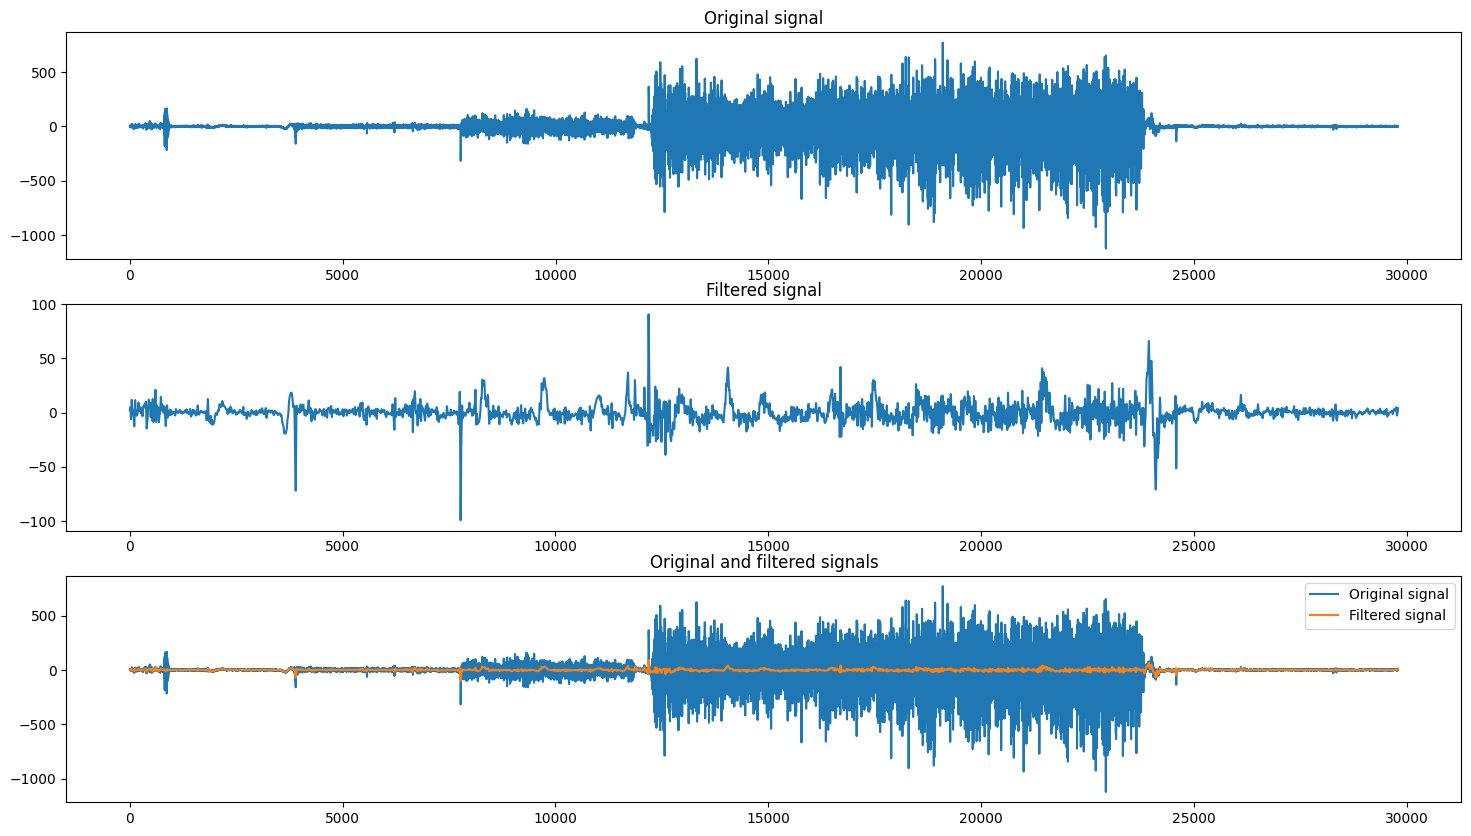

In [11]:
filtered_signal = filtering_data(data, 1)

plt.figure(figsize=(18, 10))
plt.subplot(3,1,1)
plt.plot(data)
plt.title('Original signal')

plt.subplot(3,1,2)
plt.plot(filtered_signal)
plt.title('Filtered signal')

plt.subplot(3,1,3)
plt.plot(data, label='Original signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.title('Original and filtered signals')
plt.legend()

plt.show()

## Проверка
Для проверки корректности работы фильтрации, зададим на вход сигнал синуса, свойства которого уже известны

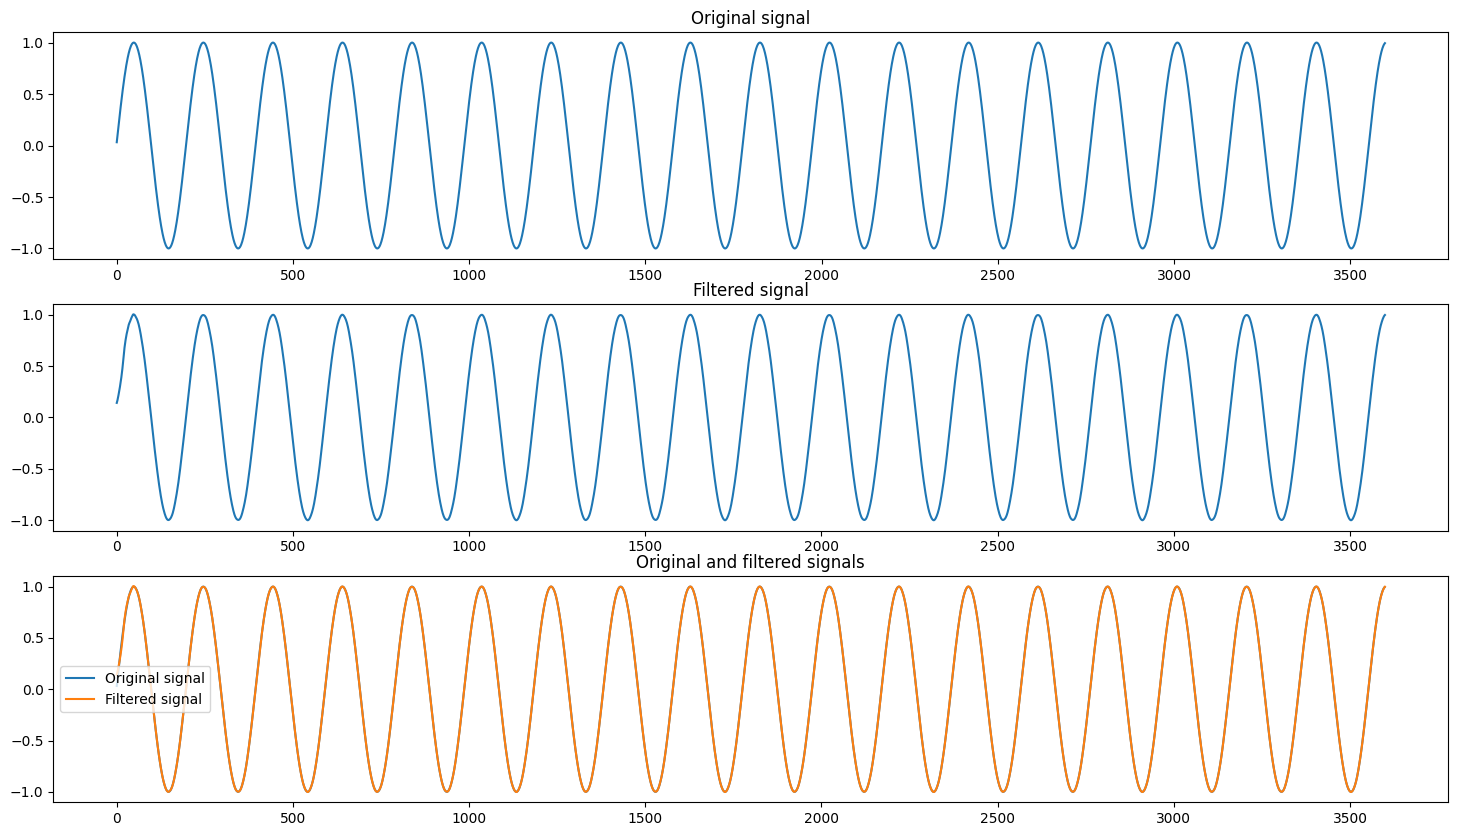

In [7]:
data = np.loadtxt('data/test.txt')

filtered_signal = filtering_data(data, 4)

plt.figure(figsize=(18, 10))
plt.subplot(3,1,1)
plt.plot(data)
plt.title('Original signal')

plt.subplot(3,1,2)
plt.plot(filtered_signal)
plt.title('Filtered signal')

plt.subplot(3,1,3)
plt.plot(data, label='Original signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.title('Original and filtered signals')
plt.legend()

plt.show()